In [1]:
import pandas as pd
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
import os
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
import numpy as np
from sklearn.metrics import mean_squared_log_error


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
cd D:\

D:\


In [4]:
cd DATASETS

D:\DATASETS


In [5]:
cd LendingClub

D:\DATASETS\LendingClub


In [6]:
subset = pd.read_csv('lending_club_subset.csv')
true_test = pd.read_csv('X_test_lending_club.csv')
X_test = true_test.copy()
df = subset.copy()

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,3600.0,3600.0,3600.0,36 months,13.99%,123.03,C,C4,Import Sales,10+ years,MORTGAGE,78069.0,Verified,Jan-2016,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,982xx,WA,22.83,0.0,Dec-2000,0.0,NaN,NaN,17.0,0.0,25888.0,76.1%,22.0,w,0.0,0.0,1842.650000,1842.65,1320.32,522.33,0.0,0.0,0.0,Apr-2017,123.03,NaN,May-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,312801.0,2.0,2.0,1.0,3.0,6.0,28553.0,87.0,2.0,5.0,7551.0,82.0,34000.0,0.0,0.0,2.0,8.0,19550.0,815.0,96.7,0.0,0.0,161.0,181.0,5.0,5.0,1.0,5.0,NaN,5.0,NaN,0.0,8.0,12.0,9.0,11.0,5.0,14.0,16.0,12.0,17.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,341759.0,54441.0,24500.0,32831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,16000.0,16000.0,16000.0,60 months,13.65%,369.40,C,C1,CAO Coordinator,1 year,RENT,65000.0,Source Verified,Apr-2014,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,804xx,CO,15.27,0.0,Oct-1994,0.0,NaN,NaN,9.0,0.0,17665.0,70.9%,20.0,f,0.0,0.0,22163.585269,22163.59,16000.00,6163.59,0.0,0.0,0.0,Apr-2019,368.99,NaN,Apr-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,39098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24900.0,NaN,NaN,NaN,2.0,4344.0,518.0,97.0,0.0,0.0,116.0,234.0,8.0,8.0,1.0,44.0,NaN,8.0,NaN,0.0,3.0,4.0,3.0,8.0,5.0,6.0,14.0,4.0,9.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,53463.0,39098.0,17400.0,28563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,35000.0,35000.0,35000.0,36 months,18.24%,1269.56,D,D5,Clinical lab Scientist,8 years,MORTGAGE,145000.0,Source Verified,May-2014,Charged Off,n,NaN,NaN,debt_consolidation,Debt c

In [8]:
df.isna().sum()

id                                            128334
member_id                                     128334
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       8477
emp_length                                      7743
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [9]:
df.shape


(128334, 144)

In [10]:
df_cols = df.columns.tolist()

In [11]:
X_test.shape

(128334, 144)

In [12]:
X_cols = X_test.columns.tolist()

In [13]:
set(df_cols) == set(X_cols)

True

In [14]:
is_na = df.isnull().sum().sort_values(ascending=False)
is_na.reset_index()

,index,0
0,id,128334
1,member_id,128334
2,url,128334
3,next_pymnt_d,128334
4,orig_projected_additional_accrued_interest,127983
5,payment_plan_start_date,127808
6,hardship_type,127808
7,hardship_reason,127808
8,hardship_status,127808
9,deferral_term,127808


In [15]:
#this set is used to get a list that is to be
#used in the wrangle funciton in order to 
#keep consistency with different dataframes
#and different numbers of nulls. same features
#each time over all new vs training data when taking the list
#and adding it into the wrangle function.

In [16]:
high_na_amount = is_na[:73].index
print(list(high_na_amount))

['id', 'member_id', 'url', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_start_date', 'hardship_end_date', 'hardship_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'hardship_dpd', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_collections_12_mths_ex_med', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'revol_bal_joint', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'settlement_percentage', 'settlement_term', 'settlement_status', 'settlement_amount', 'debt_settlement_flag_date', 'settlement_date', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'il_u

In [17]:
def wrangle(X):
    X = X.copy()

    X = X.drop(columns=[
    'id', 'member_id', 
    'url', 'zip_code',
    'next_pymnt_d',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp',
    'last_pymnt_d','delinq_2yrs',
    'recoveries','collection_recovery_fee',
    'last_pymnt_amnt'])

    
    X.issue_d = pd.to_datetime(X['issue_d'], infer_datetime_format=True)
    X.last_credit_pull_d = pd.to_datetime(X['last_credit_pull_d'],infer_datetime_format=True)
    X.earliest_cr_line = pd.to_datetime(X.earliest_cr_line, infer_datetime_format=True)

    X['revol_util'] = X['revol_util'].str.replace('%','')
    X.int_rate = X.int_rate.str.replace('%','')
    X['term'] = X['term'].str.replace("months","")
    X.int_rate = X.int_rate.astype('float64')
    X.revol_util = X.revol_util.astype('float64')
    X['term'] = X['term'].astype('int64')
    
    X.emp_length = X.emp_length.str.replace('years','')
    X.emp_length = X.emp_length.str.replace('year','')
    X.emp_length = X.emp_length.str.replace('<','')
    X.emp_length = X.emp_length.str.replace('+','')

    cols = [c for c in X.columns if c.lower()[:10] != 'settlement']
    X = X[cols]
    hardship = [c for c in X.columns if c.lower()[:8] != 'hardship']
    X = X[hardship]
    debt = [c for c in X.columns if c.lower()[:4] != 'debt']
    X = X[debt]

    #kill the whitespace
    X = X.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    print(X.shape)
    return X


In [18]:
df = wrangle(df)
X_test = wrangle(X_test)

(128334, 111)
(128334, 111)


In [19]:
df['revol_util'].head(1)
df.int_rate.head(1)

0    13.99
Name: int_rate, dtype: float64

In [20]:
numbers = df.select_dtypes('number')
numbers.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,orig_projected_additional_accrued_interest
0,3600.0,3600.0,3600.0,36,13.99,123.03,78069.0,22.83,0.0,NaN,NaN,17.0,0.0,25888.0,76.1,22.0,0.0,0.0,1842.650000,0.0,NaN,1.0,NaN,NaN,0.0,0.0,312801.0,2.0,2.0,1.0,3.0,6.0,28553.0,87.0,2.0,5.0,7551.0,82.0,34000.0,0.0,0.0,2.0,8.0,19550.0,815.0,96.7,0.0,0.0,161.0,181.0,5.0,5.0,1.0,5.0,NaN,5.0,NaN,0.0,8.0,12.0,9.0,11.0,5.0,14.0,16.0,12.0,17.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,341759.0,54441.0,24500.0,32831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16000.0,16000.0,16000.0,60,13.65,369.40,65000.0,15.27,0.0,NaN,NaN,9.0,0.0,17665.0,70.9,20.0,0.0,0.0,22163.585269,0.0,NaN,1.0,NaN,NaN,0.0,0.0,39098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24900.0,NaN,NaN,NaN,2.0,4344.0,518.0,97.0,0.0,0.0,116.0,234.0,8.0,8.0,1.0,44.0,NaN,8.0,NaN,0.0,3.0,4.0,3.0,8.0,5.0,6.0,14.0,4.0,9.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,53463.0,39098.0,17400.0,28563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35000.0,35000.0,35000.0,36,18.24,1269.56,145000.0,16.84,0.0,NaN,NaN,10.0,0.0,25221.0,69.9,23.0,0.0,0.0,15401.480000,0.0,NaN,1.0,NaN,NaN,0.0,0.0,301904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36100.0,NaN,NaN,NaN,9.0,30190.0,1287.0,92.2,0.0,0.0,55.0,100.0,20.0,10.0,2.0,23.0,NaN,11.0,NaN,0.0,2.0,4.0,2.0,8.0,6.0,6.0,15.0,4.0,10.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,329264.0,54336.0,16400.0,40099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9600.0,9600.0,9600.0,36,9.93,309.45,65000.0,32.57,1.0,11.0,NaN,27.0,0.0,8259.0,19.4,44.0,0.0,0.0,9647.660000,0.0,NaN,1.0,NaN,NaN,0.0,516.0,108570.0,3.0,9.0,3.0,3.0,2.0,100311.0,86.0,1.0,6.0,3547.0,68.0,42600.0,1.0,1.0,1.0,9.0,4021.0,27181.0,22.8,0.0,0.0,131.0,126.0,6.0,2.0,0.0,15.0,11.0,4.0,11.0,0.0,5.0,7.0,10.0,11.0,24.0,18.0,20.0,7.0,27.0,0.0,0.0,0.0,4.0,93.0,0.0,0.0,0.0,159759.0,108570.0,35200.0,117159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000.0,1000.0,1000.0,36,15.99,35.16,30000.0,15.16,0.0,NaN,NaN,4.0,0.0,3774.0,83.9,4.0,0.0,0.0,1161.185328,0.0,NaN,1.0,NaN,NaN,0.0,0.0,7618.0,0.0,1.0,0.0,0.0,34.0,3844.0,32.0,1.0,1.0,1302.0,46.0,4500.0,0.0,0.0,5.0,1.0,1905.0,13.0,99.5,0.0,0.0,34.0,50.0,8.0,8.0,0.0,8.0,NaN,7.0,NaN,0.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,16677.0,7618.0,2600.0,12177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cats = df.select_dtypes('object')
cats.head()

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,desc,purpose,title,addr_state,initial_list_status,application_type,verification_status_joint,sec_app_earliest_cr_line,payment_plan_start_date
0,C,C4,Import Sales,10,MORTGAGE,Verified,Charged Off,n,NaN,debt_consolidation,Debt consolidation,WA,w,Individual,NaN,NaN,NaN
1,C,C1,CAO Coordinator,1,RENT,Source Verified,Fully Paid,n,NaN,credit_card,Credit card refinancing,CO,f,Individual,NaN,NaN,NaN
2,D,D5,Clinical lab Scientist,8,MORTGAGE,Source Verified,Charged Off,n,NaN,debt_consolidation,Debt consolidation,CA,f,Individual,NaN,NaN,NaN
3,B,B2,Financial Controller,1,OWN,Not Verified,Fully Paid,n,NaN,car,Car financing,MN,w,Individual,NaN,NaN,NaN
4,C,C5,Head Coach,5,OWN,Source Verified,Fully Paid,n,NaN,vacation,Vacation,IL,w,Individual,NaN,NaN,NaN


In [22]:
X_test.head()
X_test.shape

(128334, 111)

In [23]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,orig_projected_additional_accrued_interest
loan_amnt,1.000000,0.999643,0.998838,0.347732,0.066143,0.952917,0.355714,0.025871,-0.036553,-0.017875,0.007800,0.186914,-0.077562,0.317646,0.095275,0.203194,NaN,NaN,0.879329,-0.020505,-0.007073,NaN,0.385274,0.016739,0.000674,-0.005976,0.318643,-0.023755,0.018976,-0.014151,0.014239,-0.002839,0.141604,-0.099732,-0.039675,-0.027233,0.371378,-0.010220,0.278672,-0.000068,0.062479,0.008640,-0.010885,0.228610,0.217059,0.038459,-0.002644,-0.001765,0.123534,0.167286,0.055115,0.034619,0.224010,0.036613,-0.045512,0.011469,-0.033766,-0.051935,0.196328,0.152008,0.220561,0.199262,0.067260,0.170031,0.172057,0.151716,0.184385,0.001987,0.003521,-0.023935,-0.040074,0.093238,0.004387,-0.103023,0.004905,0.344072,0.270462,0.387985,0.193866,0.333318,-0.106336,0.152276,0.174506,0.039671,0.027139,0.158590,-0.035001,-0.067136,0.136151,NaN,0.742884
funded_amnt,0.999643,1.000000,0.999281,0.347026,0.066444,0.953453,0.355704,0.026232,-0.036708,-0.017884,0.007710,0.187089,-0.077311,0.317586,0.095709,0.203113,NaN,NaN,0.879541,-0.020412,-0.007073,NaN,0.385274,0.016739,0.000726,-0.005976,0.318644,-0.023755,0.018976,-0.014151,0.014239,-0.002839,0.141604,-0.099732,-0.039675,-0.027233,0.371378,-0.010220,0.278673,-0.000068,0.062479,0.008640,-0.010872,0.228610,0.217049,0.038463,-0.002577,-0.001749,0.123534,0.167286,0.055115,0.034619,0.224027,0.036622,-0.045512,0.011443,-0.033766,-0.051935,0.196328,0.152008,0.220544,0.199262,0.067260,0.170031,0.172057,0.151715,0.184383,0.001987,0.003521,-0.023935,-0.040074,0.093238,0.004390,-0.102809,0.005022,0.344072,0.270477,0.387976,0.193866,0.333318,-0.106336,0.152276,0.174506,0.039671,0.027139,0.158590,-0.035001,-0.067136,0.136151,NaN,0.742884
funded_amnt_inv,0.998838,0.999281,1.000000,0.347200,0.066719,0.952660,0.355439,0.027005,-0.037634,-0.016969,0.012453,0.187373,-0.076780,0.317355,0.096061,0.203138,NaN,NaN,0.879035,-0.020216,-0.007049,NaN,0.385222,0.016820,0.000814,-0.005976,0.318665,-0.023761,0.018994,-0.014142,0.014240,-0.002862,0.141582,-0.099737,-0.039695,-0.027269,0.371379,-0.010238,0.278693,-0.000065,0.062471,0.008627,-0.010868,0.228622,0.217095,0.038400,-0.002431,-0.001753,0.123534,0.167292,0.055127,0.034613,0.224047,0.036643,-0.045517,0.011392,-0.033766,-0.051967,0.196315,0.151994,0.220554,0.199241,0.067277,0.170040,0.172050,0.151700,0.184401,0.001972,0.003514,-0.023951,-0.040074,0.093267,0.004334,-0.102417,0.005245,0.344098,0.270486,0.388005,0.193875,0.333223,-0.106243,0.152302,0.174464,0.039689,0.027234,0.158449,-0.034996,-0.067085,0.136001,NaN,0.742928
term,0.347732,0.347026,0.

In [24]:
df.shape

(128334, 111)

In [25]:
df.isna().sum()

loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       8477
emp_length                                      7743
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
desc                                          117269
purpose                                            0
title                                         

In [26]:
df.orig_projected_additional_accrued_interest.describe()

count     351.000000
mean      365.035726
std       288.100772
min        12.960000
25%       146.610000
50%       298.800000
75%       496.275000
max      1398.990000
Name: orig_projected_additional_accrued_interest, dtype: float64

In [27]:
target = 'loan_status'
df_features = df.drop(columns='loan_status')

In [28]:
y_test = X_test[target]
X_train = df_features
X_test = X_test.drop(columns='loan_status')
y_train = df[target]


X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20, 
    stratify=y_train, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_test.shape, y_train.shape, y_val.shape

((102667, 110), (25667, 110), (128334, 110), (128334,), (102667,), (25667,))

In [29]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq,first,last
pymnt_plan,102667,1,n,102667,NaN,NaN
application_type,102667,2,Individual,100385,NaN,NaN
initial_list_status,102667,2,w,62291,NaN,NaN
verification_status_joint,2257,3,Not Verified,1285,NaN,NaN
verification_status,102667,3,Source Verified,39928,NaN,NaN
grade,102667,4,B,33300,NaN,NaN
home_ownership,102667,6,MORTGAGE,51318,NaN,NaN
emp_length,96498,10,10,33797,NaN,NaN
purpose,102667,14,debt_consolidation,58654,NaN,NaN
sub_grade,102667,20,C1,7247,NaN,NaN


In [30]:
X_train.describe(exclude='object').T.sort_values(by='unique')

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
last_credit_pull_d,102661,125,2019-05-01 00:00:00,36695,2007-06-01 00:00:00,2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_d,102667,141,2016-03-01 00:00:00,3977,2007-07-01 00:00:00,2019-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
earliest_cr_line,102667,650,2002-08-01 00:00:00,714,1950-01-01 00:00:00,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,102667,NaN,NaN,NaN,NaN,NaN,14038.6,8574.46,500,7500,12000,20000,40000
funded_amnt,102667,NaN,NaN,NaN,NaN,NaN,14031.3,8571.49,500,7500,12000,20000,40000
funded_amnt_inv,102667,NaN,NaN,NaN,NaN,NaN,14012.1,8573.93,0,7500,12000,19975,40000
term,102667,NaN,NaN,NaN,NaN,NaN,40.712,9.53342,36,36,36,36,60
int_rate,102667,NaN,NaN,NaN,NaN,NaN,12.1821,3.70067,5.31,9.17,12.12,14.65,28.8
installment,102667,NaN,NaN,NaN,NaN,NaN,425.881,256.474,16.08,240.92,361.38,559.44,1516.27
annual_inc,102667,NaN,NaN,NaN,NaN,NaN,76574.5,61740.9,0,46000,65000,91452,7.6e+06


In [31]:
X_train.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc

In [32]:
categorical_features = [
    'sub_grade','grade','home_ownership',
    'purpose','addr_state',
    'verification_status'
    
]

numeric_features = X_train.select_dtypes('number').columns.tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]
X_test_subset = X_test[features]

In [33]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    #QuantileTransformer(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=800, n_jobs=-1, random_state=42)
    
)

# Fit on train, score on val, predict on test
pipeline.fit(X_train_subset, y_train)
print('Validation Accuracy on Val', pipeline.score(X_val_subset, y_val))
y_pred_val = pipeline.predict(X_val_subset)
y_pred = pipeline.predict(X_test_subset)

Validation Accuracy on Val 0.9498188335216425


In [34]:
print('Validation Accuracy on Test', pipeline.score(X_test_subset, y_test))


Validation Accuracy on Test 0.9535508906447239


In [35]:
y_pred_val = pipeline.predict(X_val_subset)

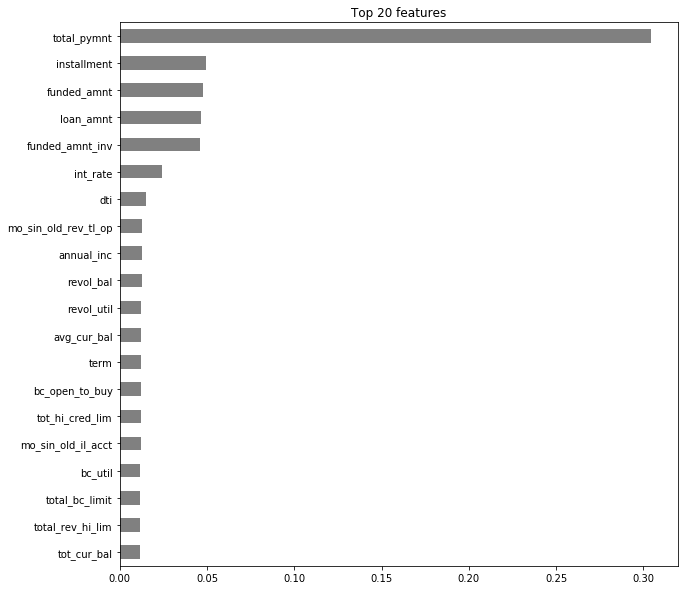

In [57]:
# Get feature importances
encoder = pipeline.named_steps['ordinalencoder']
rf = pipeline.named_steps['randomforestclassifier']
feature_names = encoder.transform(X_test_subset).columns
importances = pd.Series(rf.feature_importances_, feature_names)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

#if we had used the predicted values on this data set 

In [38]:
X_test['loan_status'] = y_pred
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,loan_status
0,7000.0,7000.0,7000.0,36,13.33,236.98,C,C3,Concierge,10,RENT,61000.0,Source Verified,2015-10-01,n,NaN,debt_consolidation,Debt consolidation,NY,4.17,2005-01-01,1.0,NaN,NaN,4.0,0.0,6231.0,84.2,4.0,w,0.0,0.0,8518.891920,2019-05-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,6231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7400.0,NaN,NaN,NaN,2.0,1558.0,832.0,80.2,0.0,0.0,NaN,128.0,2.0,2.0,0.0,2.0,NaN,2.0,NaN,0.0,2.0,4.0,2.0,2.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,7400.0,6231.0,4200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
1,15000.0,15000.0,15000.0,36,12.12,499.08,B,B3,moore oil company,10,MORTGAGE,60000.0,Not Verified,2012-11-01,n,Borrower added on 11/20/12 > I Would Like To b...,credit_card,payment plan,MO,13.42,1990-10-01,0.0,30.0,NaN,9.0,0.0,13382.0,65.6,31.0,f,0.0,0.0,17776.770002,2015-03-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,78212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20400.0,NaN,NaN,NaN,3.0,9777.0,6018.0,69.0,0.0,0.0,125.0,269.0,14.0,14.0,6.0,14.0,30.0,12.0,30.0,0.0,5.0,5.0,5.0,12.0,8.0,7.0,17.0,5.0,9.0,0.0,0.0,0.0,0.0,96.0,60.0,0.0,0.0,136730.0,19686.0,19400.0,17830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
2,21600.0,21600.0,21600.0,60,12.29,483.66,C,C1,Director,10,MORTGAGE,87000.0,Source Verified,2015-07-01,n,NaN,debt_consolidation,Debt consolidation,TX,31.86,1987-03-01,0.0,15.0,NaN,19.0,0.0,35737.0,50.1,36.0,f,0.0,0.0,11539.450000,2019-02-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,925.0,214124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71400.0,NaN,NaN,NaN,3.0,11896.0,31002.0,53.3,0.0,0.0,142.0,339.0,11.0,10.0,5.0,11.0,15.0,20.0,15.0,0.0,7.0,9.0,9.0,15.0,5.0,14.0,26.0,9.0,19.0,0.0,0.0,0.0,2.0,91.7,22.2,0.0,0.0,293093.0,122577.0,66400.0,115882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charged Off
3,2100.0,2100.0,2100.0,36,13.33,71.10,C,C3,box labeler,5,RENT,40000.0,Verified,2015-08-01,n,NaN,debt_consolidation,Debt consolidation,KS,16.14,2005-03-01,1.0,NaN,NaN,10.0,0.0,11417.0,75.1,20.0,w,0.0,0.0,424.860000,2019-05-01,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,16159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15200.0,NaN,NaN,NaN,3.0,1616.0,344.0,97.0,0.0,0.0,125.0,120.0,9.0,9.0,0.0,9.0,NaN,0.0,NaN,0.0,

In [39]:
X_test['loan_status'].value_counts(normalize=True)

Fully Paid     0.872224
Charged Off    0.127776
Name: loan_status, dtype: float64

In [40]:
true_test['loan_status'].value_counts(normalize=True)

Fully Paid     0.825775
Charged Off    0.174225
Name: loan_status, dtype: float64

In [41]:
%matplotlib inline

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_test, y_pred):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

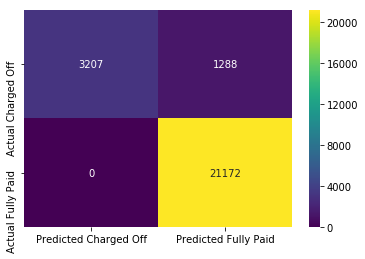

In [52]:
plot_confusion_matrix(y_val, y_pred_val)

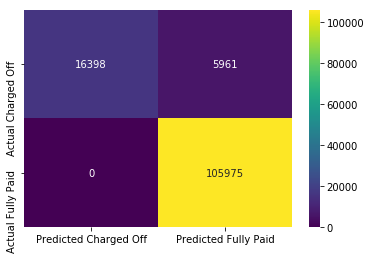

In [43]:
plot_confusion_matrix(y_test, y_pred)

In [44]:
from sklearn.metrics import classification_report
#on val set
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

 Charged Off       1.00      0.71      0.83      4495
  Fully Paid       0.94      1.00      0.97     21172

   micro avg       0.95      0.95      0.95     25667
   macro avg       0.97      0.86      0.90     25667
weighted avg       0.95      0.95      0.95     25667



In [74]:
#on test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       1.00      0.73      0.85     22359
  Fully Paid       0.95      1.00      0.97    105975

   micro avg       0.95      0.95      0.95    128334
   macro avg       0.97      0.87      0.91    128334
weighted avg       0.96      0.95      0.95    128334



In [46]:
from sklearn.metrics import roc_auc_score
#This is a classification baseline score

# What if we predicted 100% probability of the positive class for every prediction?
# This is like the majority class baseline, but with predicted probabilities,
# instead of just discrete classes.
# VERY IMPORTANT — Use predicted probabilities with ROC AUC score!
# Because, it's a metric of how well you rank/sort predicted probabilities!
y_pred_proba = np.full_like(y_val, fill_value=1.00)
roc_auc_score(y_val, y_pred_proba)

0.5

In [61]:
y_pred_proba_val = pipeline.predict_proba(X_val_subset)[:, 1]
roc_auc_score(y_val, y_pred_proba_val)

0.9699062259701619

In [56]:
y_pred_proba = pipeline.predict_proba(X_test_subset)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.9764186293237733

In [75]:
# from ipywidgets import interact, fixed
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.multiclass import unique_labels

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    """
    For binary classification problems. 
    y_pred_proba : predicted probability of class 1
    """
    
    # Apply threshold to predicted probabilities
    # to get discrete predictions
    class_0, class_1 = unique_labels(y_true)
    y_pred = np.full_like(y_true, fill_value=class_0)
    y_pred[y_pred_proba > threshold] = class_1
    
    # Plot distribution of predicted probabilities
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.title('Distribution of predicted probabilities')
    plt.show()

    # Calculate true positive rate and false positive rate
    true_positives = (y_pred==y_true) & (y_pred==class_1)
    false_positives = (y_pred!=y_true) & (y_pred==class_1)
    actual_positives = (y_true==class_1)
    actual_negatives = (y_true==class_0)
    true_positive_rate = true_positives.sum() / actual_positives.sum()
    false_positive_rate = false_positives.sum() / actual_negatives.sum()
    print('False Positive Rate', false_positive_rate)
    print('True Positive Rate', true_positive_rate)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Plot point on ROC curve for the current threshold
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()
    
    # Show ROC AUC score
    print('Area under the Receiver Operating Characteristic curve:', 
          roc_auc_score(y_true, y_pred_proba))
    
    # Show confusion matrix & classification report
    plot_confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))

interact(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba_val), 
         threshold=(0,1,0.05));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

## ROC ON TEST SET

In [63]:
interact(set_threshold, 
         y_true=fixed(y_test), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.05));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

# Trying to go on to dollar value of model accuracy tbc

#imputing mean service fee since there was no obvious pattern

In [48]:
X_test['service_fee_rate'] = 1.0505172413793107

In [49]:
X_test['default'] = X_test['loan_status'].replace({'Fully Paid':True, 'Charged Off':False})
X_test['default'].head()

0     True
1     True
2    False
3    False
4     True
Name: default, dtype: bool

In [50]:
X_test['worst'] = -25
X_test['best'] = (25  # original investment returned, plus interest...
                  + 25 * X_test['term']/12 # for a given number of years ...
                  * (X_test['int_rate'] - X_test['service_fee_rate']) / 100)

In [51]:
X_test['percent_paid'] = X_test['total_pymnt'] / X_test['funded_amnt']
X_test['percent_paid'].head()

0    1.216985
1    1.185118
2    0.534234
3    0.202314
4    1.283408
Name: percent_paid, dtype: float64